In [1]:
import numpy as np
import pandas as pd

In [6]:
df = pd.read_excel('Dataset/Bank_Personal_Loan_Modelling.xlsx',sheet_name=1)

In [7]:
df.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [13]:
df = df.drop(['ID','ZIP Code'], axis=1)
df.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [14]:
y = df.iloc[:,9]
X = df.drop(['Personal Loan'], axis=1)

In [15]:
df.isna().sum()

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

# Creating Random Forest Model

In [17]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=1000, max_features=2, oob_score=True)
rfc.fit(X,y)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features=2,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=1000,
                       n_jobs=None, oob_score=True, random_state=None,
                       verbose=0, warm_start=False)

In [18]:
feat = ['Age', 'Experience', 'Income','Family', 'CCAvg','Education', 'Mortgage', 'Securities Account','CD Account', 
     'Online', 'CreditCard']
for feature,imp in zip(feat, rfc.feature_importances_):
    print(feature,"  :  ",imp);

Age   :   0.014060614427043129
Experience   :   0.014709120435847017
Income   :   0.03744308697798986
Family   :   0.011193001507470324
CCAvg   :   0.027403191166539415
Education   :   0.01191094149905472
Mortgage   :   0.016663976387921994
Securities Account   :   0.06507570536927446
CD Account   :   0.7197955092670518
Online   :   0.02567689178263167
CreditCard   :   0.056067961179175535


From this we can infer that Income, CCAvg, Education, Family have value more than 0.05. Now lets consider this has the important features and use these features in decision tree

In [25]:
DTFeat = df[[ 'Income', 'CCAvg', 'Education', 'Family']]

# Creating Decision Tree Model

In [26]:
from sklearn.tree import DecisionTreeClassifier
DTclf = DecisionTreeClassifier(max_depth=10)
DTclf.fit(DTFeat,y)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [29]:
features = ['Income', 'CCAvg', 'Education', 'Family']

In [27]:
from sklearn import tree
from sklearn.tree import export_graphviz
from IPython.display import SVG
from graphviz import Source
from IPython.display import display

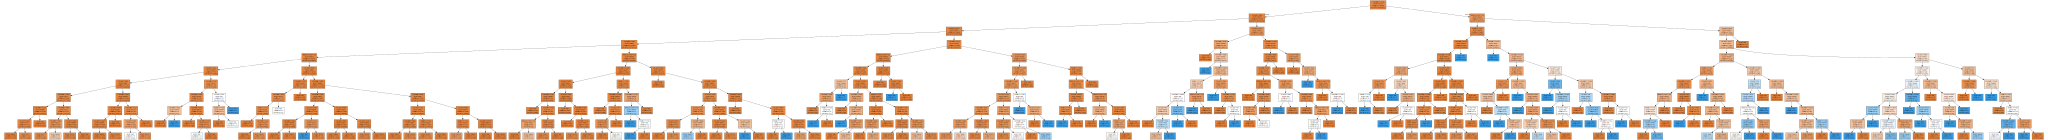

In [30]:
graph = Source(tree.export_graphviz(DTclf, out_file=None, feature_names=features, filled = True))
display(SVG(graph.pipe(format='svg')))

In [32]:
DTclf.score(DTFeat,y)

0.9602

----------